In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df1 = pd.read_csv('data.csv')
df1.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,64.13,2058.81,2.53,1307.94,5815.68,21.06,4.1099,0.7434,0.4052
1,68.21,1883.68,2.73,610.06,6343.57,9.71,0.9330,0.7421,0.4044
2,45.27,948.74,3.90,480.06,6251.32,23.71,4.1899,0.7915,0.3997
3,66.97,2036.34,15.26,700.38,7795.69,61.04,1.6463,0.9139,0.3991
4,67.21,1340.54,10.36,1209.46,123.96,20.47,2.1917,0.8877,0.3980


In [3]:
X = df1.iloc[:,0:7].values
y = df1.iloc[:,8].values
X = StandardScaler().fit_transform(X)

In [4]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree=3)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[ 1.        ,  0.48957108,  1.10367146, ...,  0.84286464,
        -1.4364521 ,  2.44807355],
       [ 1.        ,  0.95988903,  0.77149069, ..., -2.77580895,
        -4.14129935, -6.1785089 ],
       [ 1.        , -1.6844967 , -1.00187251, ...,  0.67645419,
        -1.40333883,  2.9112982 ],
       ...,
       [ 1.        , -0.67469639,  1.53622914, ...,  1.68507618,
        -1.28566228,  0.98092152],
       [ 1.        , -1.63608161,  0.37392836, ...,  0.52880789,
        -0.77257699,  1.12871843],
       [ 1.        ,  0.39504639,  1.22553873, ...,  0.37714691,
         0.17526859,  0.08145123]])

In [6]:
model = LinearRegression()
model.fit(X_poly,y)


LinearRegression()

In [7]:
y_pred = model.predict(X_poly)

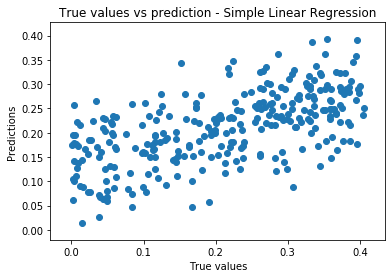

In [8]:
#To make predictions on the test data
plt.title('True values vs prediction - Simple Linear Regression')
plt.scatter(y, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [9]:
print("Score:", model.score(X_poly, y_pred))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Score: 1.0
Mean Absolute Error: 0.07792724744163385
Mean Squared Error: 0.00943259372171429
Root Mean Squared Error: 0.09712154097683114


In [10]:
df2 = pd.read_csv('fake_data2.csv')
df2.head()

,Unnamed: 0,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.
0,0,53.354916,1105.131030,12.866271,1378.931539,2812.615651,75.644196,3.362807,0.720520
1,1,72.253429,1026.314843,3.423903,1028.746252,919.916861,44.206304,3.867924,0.894034
2,2,65.079401,722.964244,6.230333,2017.919532,1212.421227,17.551850,2.355172,0.766147
3,3,60.705998,1557.232097,11.711388,558.221048,1716.090808,65.786882,1.725340,0.773793
4,4,46.187411,1304.419244,8.574967,1280.469348,1929.219744,37.446782,1.832729,0.761055


In [11]:
X2 = df2.iloc[:,1:8]
X2 = X2.values
X2 = StandardScaler().fit_transform(X2)
X2_poly = pre_process.fit_transform(X2)

In [12]:
df2['CR-corrosion defect']= model.predict(X2_poly)


In [13]:
df2

,Unnamed: 0,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,0,53.354916,1105.131030,12.866271,1378.931539,2812.615651,75.644196,3.362807,0.720520,0.103325
1,1,72.253429,1026.314843,3.423903,1028.746252,919.916861,44.206304,3.867924,0.894034,0.127113
2,2,65.079401,722.964244,6.230333,2017.919532,1212.421227,17.551850,2.355172,0.766147,0.276000
3,3,60.705998,1557.232097,11.711388,558.221048,1716.090808,65.786882,1.725340,0.773793,0.270257
4,4,46.187411,1304.419244,8.574967,1280.469348,1929.219744,37.446782,1.832729,0.761055,0.102044
...,...,...,...,...,...,...,...,...,...,...
9995,9995,69.201116,2079.281303,16.713888,1605.838233,5812.948938,86.242124,2.830137,0.782226,0.248988
9996,9996,70.508290,472.672029,13.174837,1626.383159,2138.250034,33.396877,4.105065,0.793817,0.032906
9997,9997,72.122020,969.782093,0.566781,657.276165,6986.528267,27.285670,4.012049,0.795380,0.374616
9998,9998,54.107606,1239.970711,7.171394,979.850741,4872.282843,36.438222,1.404221,0.739723,0.157018


In [14]:
df2.to_csv('fake_data_predicted.csv')